# Data cleaning by example




## Imports and files
The first thing we'll try is loading some data and plotting it. To do this, we'll need some packages. Let's load up pandas, a package for data management, and matplotlib. The python command for this is `import`.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

## Reading data in with pandas

Let's now read in an MRICloud dataset using pandas. We want to use the function `read_csv` within pandas. Notice we imported pandas `as pd` so the command is `pd.read_csv`. Also, pandas can accept URLs, so we just put the link to the file in the argument. The data we want to read in is in a github repo I created.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv")

Let's look at the first 4 rows of our dataframe. The object `dataset` is a `pandas` object with associated methods. One is `head` which allows one to see the first few rows of data. 

In [3]:
df.head(4)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0,374,128.3013,51.8593,1,1
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0,300,135.0683,53.6471,1,1
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15,295,193.5488,32.2733,1,1
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10,335,193.7051,32.7869,1,1


# Working with the data

Let's get rid of the column `rawid` and the unnamed column since they're kind of useless for today's lecture. Also let's work with only the volume.

In [4]:
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],\
             axis = 1)

Now let's create a column called `icv` for intra-cranial volume. ICV is defined as the summ of the Type I Level 1 structures and cerebrospinal fluid. For the rest of this lecture, we're just going to look at this type and level.

In [5]:
## Extract the Type 1 Level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]
## Create a new column based on ICV
t1l1 = t1l1.assign(icv = sum(t1l1.volume))
t1l1

,roi,volume,type,level,icv
0,Telencephalon_L,531111,1,1,1378295
1,Telencephalon_R,543404,1,1,1378295
2,Diencephalon_L,9683,1,1,1378295
3,Diencephalon_R,9678,1,1,1378295
4,Mesencephalon,10268,1,1,1378295
5,Metencephalon,159402,1,1,1378295
6,Myelencephalon,4973,1,1,1378295
7,CSF,109776,1,1,1378295


Now the TBV is defined as the sum of the volume for all rows except CSF. 

In [6]:
t1l1 = t1l1.assign(tbv = sum(t1l1.volume[(t1l1.roi != 'CSF')]))
t1l1

,roi,volume,type,level,icv,tbv
0,Telencephalon_L,531111,1,1,1378295,1268519
1,Telencephalon_R,543404,1,1,1378295,1268519
2,Diencephalon_L,9683,1,1,1378295,1268519
3,Diencephalon_R,9678,1,1,1378295,1268519
4,Mesencephalon,10268,1,1,1378295,1268519
5,Metencephalon,159402,1,1,1378295,1268519
6,Myelencephalon,4973,1,1,1378295,1268519
7,CSF,109776,1,1,1378295,1268519


Let's look at brain composition.

In [7]:
t1l1 = t1l1.assign(comp = lambda x: x.volume / x.tbv)
t1l1

,roi,volume,type,level,icv,tbv,comp
0,Telencephalon_L,531111,1,1,1378295,1268519,0.418686
1,Telencephalon_R,543404,1,1,1378295,1268519,0.428377
2,Diencephalon_L,9683,1,1,1378295,1268519,0.007633
3,Diencephalon_R,9678,1,1,1378295,1268519,0.007629
4,Mesencephalon,10268,1,1,1378295,1268519,0.008094
5,Metencephalon,159402,1,1,1378295,1268519,0.125660
6,Myelencephalon,4973,1,1,1378295,1268519,0.003920
7,CSF,109776,1,1,1378295,1268519,0.086539


# Plotting

Pandas has built in methods for plotting. Later on, we'll try different plotting packages. 

<AxesSubplot:xlabel='roi'>

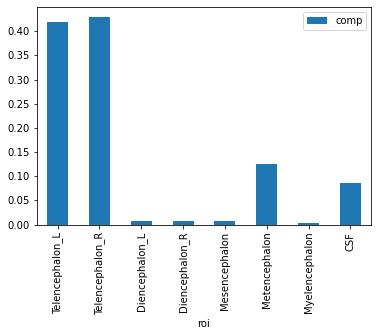

In [8]:
t1l1.plot.bar(x='roi',y='comp')

In colab, you have to install packages it doesn't have everytime you reconnect the runtime. I've commented this out here, since plotly is already installed locally for me. To install in colab, use a `!` in front of the unix command. In this case we're using the python package management system `pip` to install plotly, an interactive graphing envinronment. 

In [9]:
#!pip install plotly==4.0.0

We can create an interactive plot with `plotly`. This is a professionally developed package that makes interactive plotting very easy. Also, it renders nicely within colab or jupyter notebooks. For plotly graphics, I would suggest assigning the graph to a variable then calling that variable to show the plot. This way you can modify the plot later if you'd like.

In [10]:
import plotly.express as px
myplot = px.bar(t1l1, x='roi', y='volume')
myplot.show()

ModuleNotFoundError: No module named 'plotly'